In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [8]:
data_path = '../../data/postprocessed/GaussMeanINPUTS/'

mapping_table = {
    'gpuburn5min0': 'Mean = 0, Var = 1',
    'gpuburn5min1': 'Mean = 1, Var = 1',
    'gpuburn5min2': 'Mean = 2, Var = 1',
    'gpuburn5min3': 'Mean = 3, Var = 1',
    'gpuburn5min4': 'Mean = 4, Var = 1',
    'gpuburn5minRandom1': 'Original GPU-burn'
}

data_sheet = pd.DataFrame()
for csv_name in [file for file in os.listdir(data_path) if (file.endswith('_telemetry.csv') and ('NN50Perc' in file or '5min' in file))]:
    csv_full_path = os.path.join(data_path, csv_name)
    print(csv_full_path)
    df = pd.read_csv(csv_full_path)
    df['Index'] = range(len(df))
    df['progress'] = df['Index'].transform(
        lambda x: 100 * (x - x.min()) / (x.max() - x.min()) if x.max() > x.min() else 0)
    df['Range'] = int(csv_name.split('_')[1].split('_')[0])
    df['App_name'] = mapping_table[csv_name.split('_')[0] + csv_name.split('_')[1]]

    data_sheet=pd.concat([data_sheet, df], ignore_index=True)

../../data/postprocessed/GaussMeanINPUTS/gpuburn5minRandom_1_telemetry.csv
../../data/postprocessed/GaussMeanINPUTS/gpuburn5min_1_1_telemetry.csv
../../data/postprocessed/GaussMeanINPUTS/gpuburn5min_2_1_telemetry.csv
../../data/postprocessed/GaussMeanINPUTS/gpuburn5min_3_1_telemetry.csv
../../data/postprocessed/GaussMeanINPUTS/gpuburn5min_0_1_telemetry.csv
../../data/postprocessed/GaussMeanINPUTS/gpuburn5min_4_1_telemetry.csv


In [9]:
data_sheet.columns

Index(['timestamp_ns', 'gpu_index', 'name', 'temperature_C',
       'util_gpu_percent', 'util_mem_percent', 'mem_total_MB', 'mem_used_MB',
       'mem_free_MB', 'clock_sm_MHz', 'clock_mem_MHz', 'clock_graphics_MHz',
       'fan_speed_percent', 'power_draw_W', 'ecc_volatile_corrected',
       'ecc_volatile_uncorrected', 'ecc_aggregate_corrected',
       'ecc_aggregate_uncorrected', 'total_energy_mJ', 'Index', 'progress',
       'Range', 'App_name'],
      dtype='object')

### Drop meaningless columns

In [10]:
data_sheet.describe()

,gpu_index,temperature_C,util_gpu_percent,util_mem_percent,mem_total_MB,mem_used_MB,mem_free_MB,clock_sm_MHz,clock_mem_MHz,clock_graphics_MHz,fan_speed_percent,power_draw_W,ecc_volatile_corrected,ecc_volatile_uncorrected,ecc_aggregate_corrected,ecc_aggregate_uncorrected,total_energy_mJ,Index,progress,Range
count,2013.0,2013.000000,2013.000000,2013.000000,2013.0,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.0,2013.000000,2013.0,2013.0,2013.0,2013.0,2.013000e+03,2013.000000,2013.000000,2013.000000
mean,0.0,59.756085,90.100845,11.900646,8188.0,7302.733731,885.266269,1385.438152,5303.137109,1385.438152,-1.0,32.326936,-1.0,-1.0,-1.0,-1.0,3.266688e+08,167.263289,50.000000,1.831595
std,0.0,5.275192,25.836931,10.396277,0.0,2011.939431,2011.939431,410.320109,1119.436123,410.320109,0.0,7.820756,0.0,0.0,0.0,0.0,7.340270e+07,96.897038,28.960880,1.342809
min,0.0,39.000000,0.000000,0.000000,8188.0,353.000000,253.000000,26.000000,405.000000,26.000000,-1.0,1.855000,-1.0,-1.0,-1.0,-1.0,2.098742e+08,0.000000,0.000000,0.000000
25%,0.0,57.000000,98.000000,2.000000,8188.0,7933.000000,255.000000,1170.000000,5500.000000,1170.000000,-1.0,33.702000,-1.0,-1.0,-1.0,-1.0,2.625373e+08,83.000000,24.925816,1.000000
50%,0.0,61.000000,99.000000,15.000000,8188.0,7933.000000,255.000000,1245.000000,5500.000000,1245.000000,-1.0,34.778000,-1.0,-1.0,-1.0,-1.0,3.198446e+08,167.000000,50.000000,2.000000
75%,0.0,64.000000,100.000000,17.000000,8188.0,7933.000000,255.000000,1695.000000,5500.000000,1695.000000,-1.0,34.992000,-1.0,-1.0,-1.0,-1.0,3.962086e+08,251.000000,75.074184,3.000000
max,0.0,70.000000,100.000000,100.000000,8188.0,7935.000000,7835.000000,2040.000000,7000.000000,2040.000000,-1.0,39.796000,-1.0,-1.0,-1.0,-1.0,4.551372e+08,337.000000,100.000000,4.000000


In [11]:
metrics_map = {
    'temperature_C':'Temperature [°C]',
    'util_gpu_percent': 'GPU Utilization [%]',
    'util_mem_percent':'GPU Memory Utilization [%]',
    'mem_used_MB':'Used Memory [MB]', 
    'mem_free_MB':'Free Memory [MB]', 
    'clock_sm_MHz':'Streaming Multiprocessor Clock Frequency [MHz]', 
    'clock_mem_MHz':'Memory Clock Frequency [MHz]', 
    'power_draw_W':'GPU Power Consumption [W]'
}
data_sheet.rename(columns=metrics_map, inplace=True)
# data_sheet['timestamp_s'] = data_sheet['timestamp_ns'] / 1e9

In [12]:
data_sheet.drop(labels=['ecc_volatile_uncorrected', 'ecc_volatile_uncorrected', 'ecc_aggregate_corrected', 'ecc_aggregate_uncorrected', 'fan_speed_percent'], axis=1, inplace=True)

In [13]:
# hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, column_name):
    print(df['App_name'].unique())
    fig, ax = plt.subplots(figsize=(10, 5))
    # df = df[df['Index']<350]
    sns.lineplot(data=df, x='Index', y=column_name, ax=ax, hue='App_name')
    ax.set_title(f'{column_name} over time', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel(column_name, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


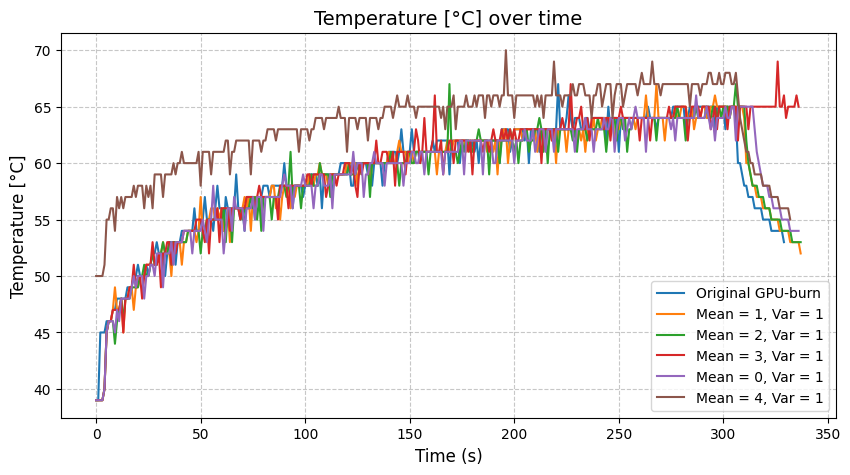

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


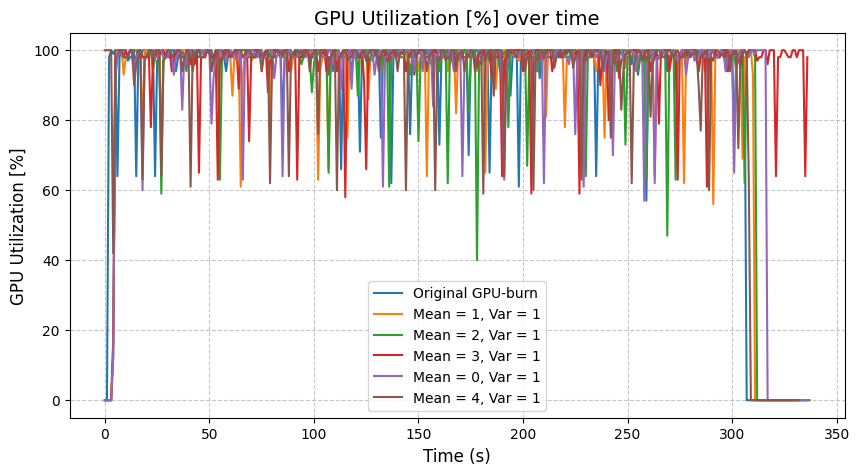

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


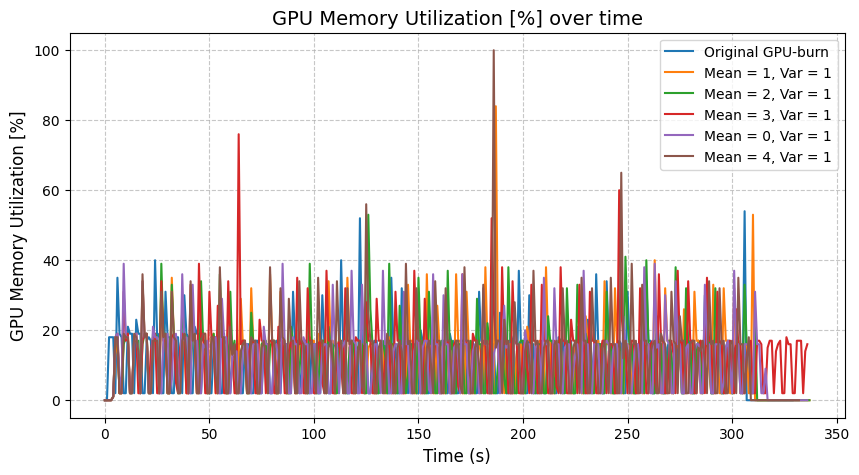

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


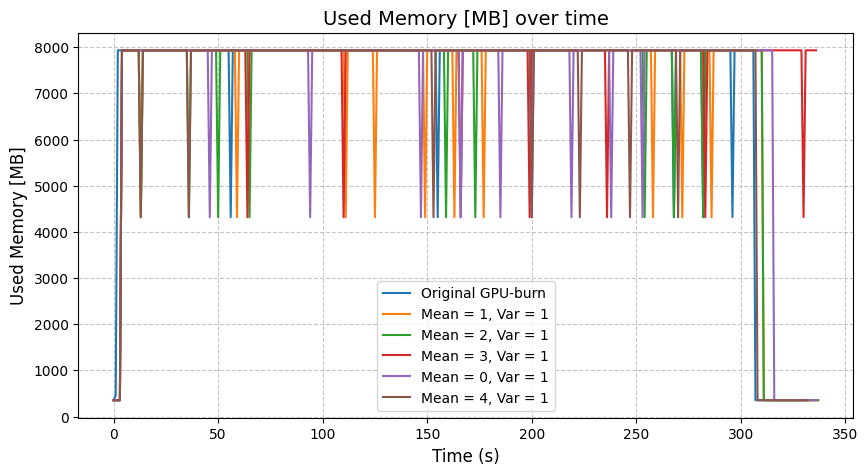

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


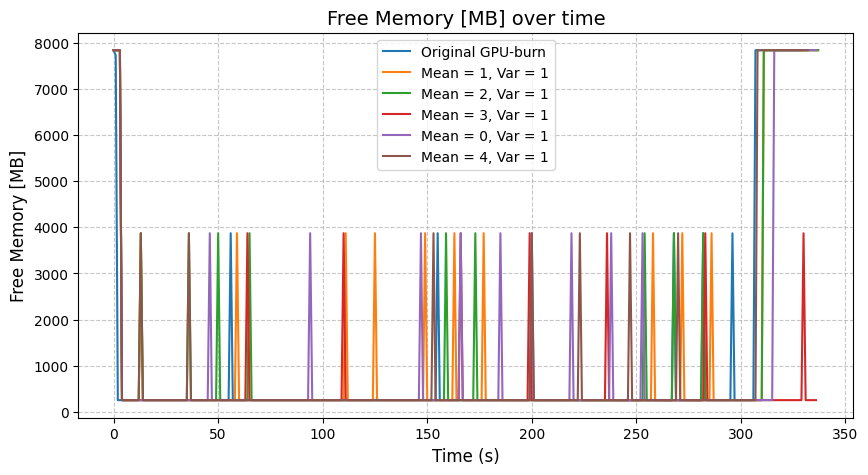

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


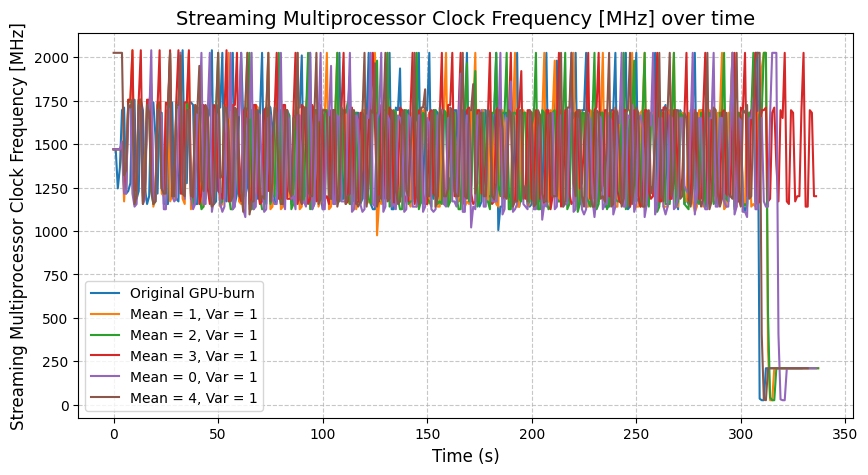

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


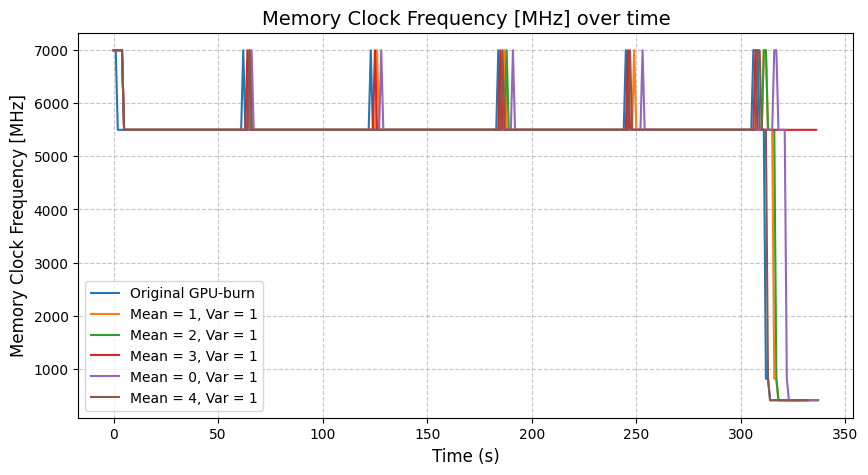

['Original GPU-burn' 'Mean = 1, Var = 1' 'Mean = 2, Var = 1'
 'Mean = 3, Var = 1' 'Mean = 0, Var = 1' 'Mean = 4, Var = 1']


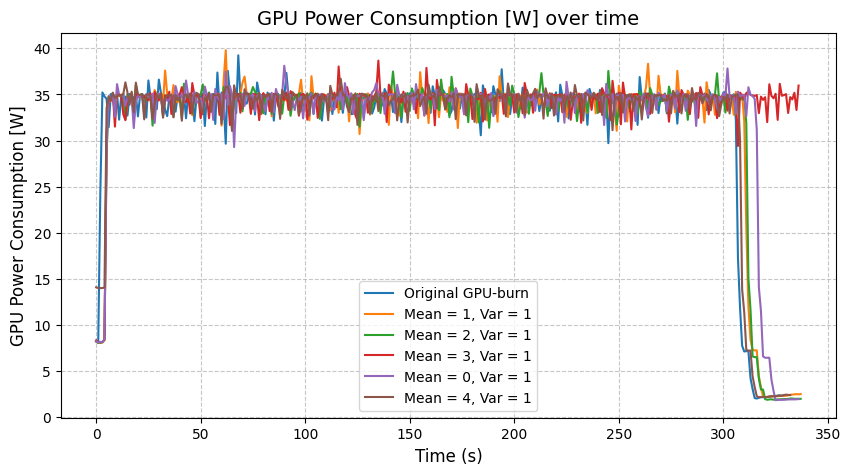

In [14]:
for column in metrics_map.values():
    plot_gpu_metric(data_sheet, column)

### To me it seems that the application is run at maximum 7 times to satisfy experimental conditions

In [27]:
# hue_order = ['Backpropagation algorithm', 'Gaussian Elimination', 'Lenet5', 'GPU-burn']
def plot_gpu_metric(df, range_lab):
    data = df[df['Range']==range_lab]
    # data['timestamp_s'] = data['timestamp_ns'] / 1e9
    # data['timestamp_s'] = data.groupby('App_name')['timestamp_s'].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(data=data, x='Index', y='Temperature [°C]', ax=ax, hue='App_name')
    ax.set_title(f'Temperature [°C] over time for range = {range_lab}', fontsize=14)
    ax.set_xlabel('Time (s)', fontsize=12)
    ax.set_ylabel('Temperature [°C]', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()
    # ax.set_xlim(right=5000)
    plt.show()

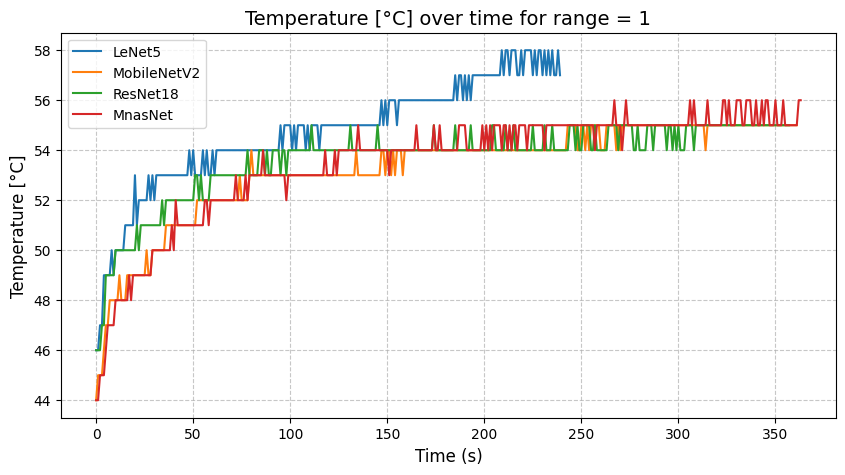

In [28]:
for range_lab in sorted(data_sheet['Range'].unique()):
    plot_gpu_metric(data_sheet, range_lab)